In [360]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import plotly.express as px

In [361]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [362]:
k=test["PassengerId"]
k

0       892
1       893
2       894
3       895
4       896
       ... 
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64

In [363]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [364]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [365]:
def information(data):
    print(data.isnull().sum())
    print(data.describe())
    print(data.info())

In [366]:
information(train)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  


In [367]:
information(test)

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64
       PassengerId      Pclass         Age       SibSp       Parch        Fare
count   418.000000  418.000000  332.000000  418.000000  418.000000  417.000000
mean   1100.500000    2.265550   30.272590    0.447368    0.392344   35.627188
std     120.810458    0.841838   14.181209    0.896760    0.981429   55.907576
min     892.000000    1.000000    0.170000    0.000000    0.000000    0.000000
25%     996.250000    1.000000   21.000000    0.000000    0.000000    7.895800
50%    1100.500000    3.000000   27.000000    0.000000    0.000000   14.454200
75%    1204.750000    3.000000   39.000000    1.000000    0.000000   31.500000
max    1309.000000    3.000000   76.000000    8.000000    9.000000  512.329200
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to

In [368]:
def drop(data):
    col=['PassengerId','Name','Ticket']

    data.drop(col,inplace=True,axis=1)

In [369]:
drop(train)

In [370]:
drop(test)

In [371]:
def fill(data):
    data["Age"].fillna(data["Age"].median(),inplace=True)
    data["Cabin"].fillna("c00",inplace=True)

In [372]:
fill(test)
fill(train)

In [373]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,c00,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,c00,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,c00,S


In [374]:
test["Fare"].fillna(test["Fare"].median,inplace=True)

In [375]:
train["Embarked"].fillna("u",inplace=True)

In [376]:
information(train)
information(test)

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Cabin       0
Embarked    0
dtype: int64
         Survived      Pclass         Age       SibSp       Parch        Fare
count  891.000000  891.000000  891.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.361582    0.523008    0.381594   32.204208
std      0.486592    0.836071   13.019697    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   22.000000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   35.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    -

In [377]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,34.5,0,0,7.8292,c00,Q
1,3,female,47.0,1,0,7.0,c00,S
2,2,male,62.0,0,0,9.6875,c00,Q
3,3,male,27.0,0,0,8.6625,c00,S
4,3,female,22.0,1,1,12.2875,c00,S


In [378]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,c00,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,c00,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,c00,S


In [379]:
male_survived=train[(train["Sex"]=="male")&(train["Survived"])==1]
male_survived=len(male_survived)
female_survived=train[(train["Sex"]=="female")&(train["Survived"])==1]
female_survived=len(female_survived)
total_survive=male_survived+female_survived
survived_passengers = train[train["Survived"] == 1]
fig = px.pie(survived_passengers, names="Sex", title="Distribution of Genders Among Survived Passengers")
fig.show()
print(f"male_survived:  {male_survived/total_survive *100}%")
print(f"female_survived:  {female_survived/total_survive *100}%")

male_survived:  31.871345029239766%
female_survived:  68.12865497076024%


In [380]:
male_death=train[(train["Sex"]=="male")&(train["Survived"])==0]
male_death=len(male_death)
female_death=train[(train["Sex"]=="female")&(train["Survived"])==0]
female_death=len(female_death)
total_death=male_death+female_death
death_passengers = train[train["Survived"] == 0]
fig = px.pie(death_passengers, names="Sex", title="Distribution of Genders Among death Passengers")
fig.show()
print(f"male_survived:  {male_death/total_death *100}%")
print(f"female_survived:  {female_death/total_death *100}%")

male_survived:  54.30555555555555%
female_survived:  45.69444444444444%


In [381]:
fig = px.pie(survived_passengers, names="Pclass", title="Distribution of class Among Survived Passengers")
fig.show()

In [382]:
fig = px.pie(death_passengers, names="Pclass", title="Distribution of class Among death Passengers")
fig.show()

<Axes: xlabel='Survived', ylabel='Age'>

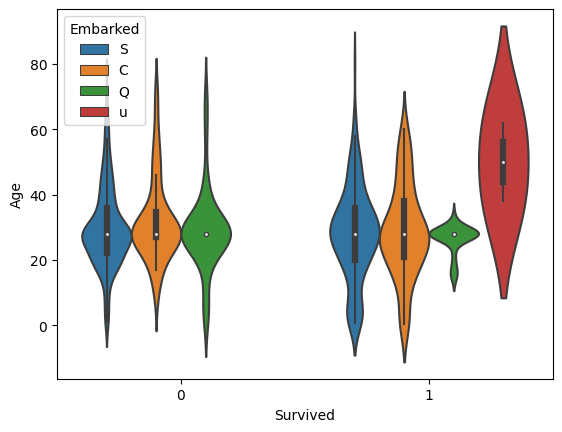

In [383]:

sns.violinplot(data=train,y="Age",x="Survived",hue="Embarked",scale="width")

<Axes: xlabel='Pclass', ylabel='count'>

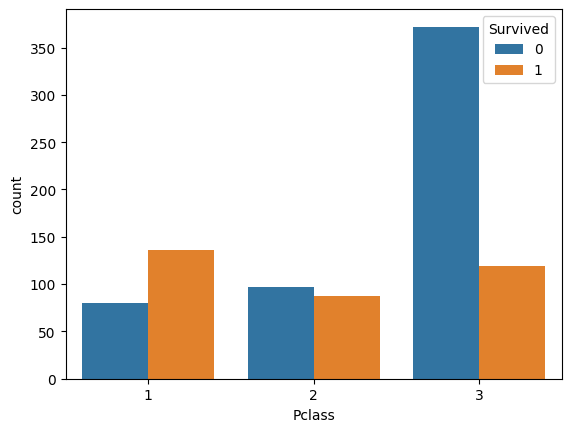

In [384]:

sns.countplot(data=train,x="Pclass",hue="Survived")

<Axes: xlabel='SibSp', ylabel='count'>

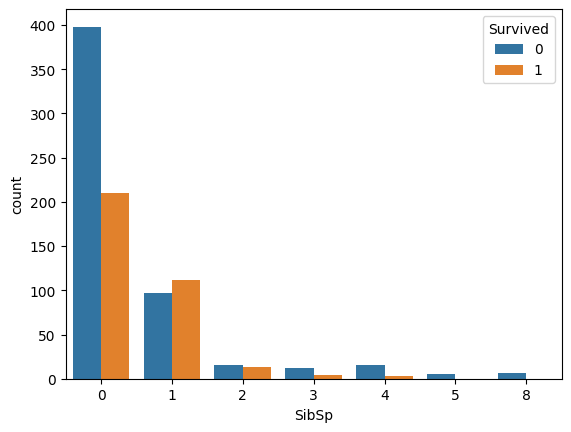

In [385]:
sns.countplot(data=train,x="SibSp",hue="Survived")

<Axes: xlabel='Embarked', ylabel='count'>

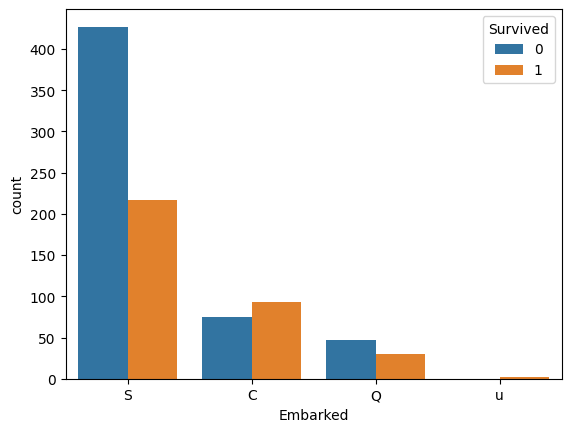

In [386]:
sns.countplot(data=train,x="Embarked",hue="Survived")

<Axes: xlabel='Parch', ylabel='count'>

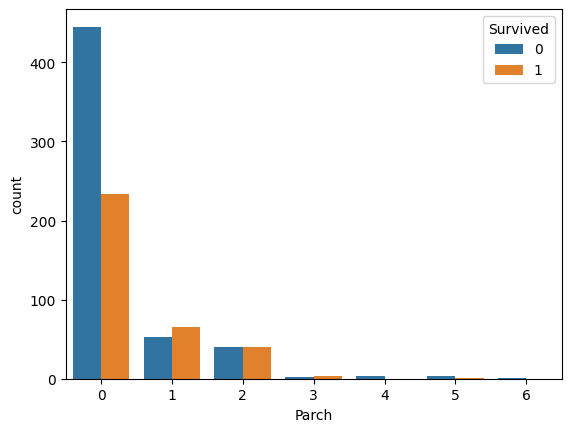

In [387]:
sns.countplot(data=train,x="Parch",hue="Survived")

In [388]:
def encode(data):
    col1=["Sex","Cabin"	,"Embarked"]
    lb=LabelEncoder()
    for colt in col1:
        data[colt]=lb.fit_transform(data[colt])

In [389]:
encode(train)

In [390]:
encode(test)

In [391]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,1,34.5,0,0,7.8292,76,1
1,3,0,47.0,1,0,7.0,76,2
2,2,1,62.0,0,0,9.6875,76,1
3,3,1,27.0,0,0,8.6625,76,2
4,3,0,22.0,1,1,12.2875,76,2


In [392]:

test['Fare'] = pd.to_numeric(test['Fare'], errors='coerce')

test['Fare'].fillna(test['Fare'].mean(), inplace=True)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    int64  
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      418 non-null    float64
 6   Cabin     418 non-null    int64  
 7   Embarked  418 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 26.3 KB


In [393]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     891 non-null    int64  
 8   Embarked  891 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 62.8 KB


In [394]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,22.0,1,0,7.2500,147,2
1,1,1,0,38.0,1,0,71.2833,81,0
2,1,3,0,26.0,0,0,7.9250,147,2
3,1,1,0,35.0,1,0,53.1000,55,2
4,0,3,1,35.0,0,0,8.0500,147,2


In [395]:
regression=LogisticRegression()
regression.fit(train.iloc[:,1:].values,train.iloc[:,0].values)

/home/kushagra/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [396]:
p=test.iloc[:,:].values
z=regression.predict(p)


In [397]:
df=pd.DataFrame({"PassengerID":k,"Survived":z})

In [398]:
df

,PassengerID,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [399]:
df.to_csv("Submission.csv",index=False)